<a href="https://colab.research.google.com/github/PMwango/PMwango/blob/main/KENYAN_ACCIDENTS_DB_2016_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

#**Loading the Dataset**

In [3]:
import pandas as pd
import numpy as np
#Load the Excel file
KE_Accidents = pd.ExcelFile('/content/kenya-accidents-database.xlsx')

#Read the 2016 and 2017 sheets as separate dataframes
df_2016 = pd.read_excel(KE_Accidents, '2016')
df_2017 = pd.read_excel(KE_Accidents, '2017')

#Combine the data into one DataFrame while resetting the row index to prevent duplicate indices
df = pd.concat([df_2016, df_2017], ignore_index=True)

#Close the ExcelFile object to release memory
KE_Accidents.close()

# Assign the concatenated DataFrame to KE_Accidents
KE_Accidents = df

#Export to CSV (all data on the same "sheet" i.e. same file)
# df.to_csv('Kenya_accidents_2016_2017_combined.csv', index=False)
df.head()

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,BRIEF ACCIDENT DETAILS,VICTIM,GENDER,NO.,Date DD/MM/YYYY
0,630,KITUI,MAKUENI,KITUI-ITHOKWE,KITUI SCHOOL,HEAD ON COLLISION,M/CYCLIST,M,1,2016-06-25
1,830,VOI,TAITA TAVETA,MOMBASA-NAIROBI,IKANGA,HEAD ON COLLISION,M/CYCLIST,M,1,2016-06-25
2,1330,MARIAKANI,KILIFI,MOMBASA-NAIROBI,KATOLANI,THE UNKNOWN M/V HIT THE MOTOR CYCLE,M/CYCLIST,M,1,2016-06-25
3,2100,ONGATA RONGAI,NAKURU,NAKURU-NAIROBI,MAASAI LODGE,THE VEHICLE KNOCKED DOWN A PEDESTRIAN WHO WAS ...,PEDESTRIAN,M,1,2016-06-25
4,1900,MATUU,MACHAKOS,MATUU-MWINGI,KIVANDINI,THE VEHICLE OVERTOOK A M/CYCLE AND LOST CONTRO...,PASSENGER,M,1,2016-06-25


In [4]:
# View column names
KE_Accidents.columns

Index(['TIME 24 HOURS', 'BASE/SUB BASE', 'COUNTY', 'ROAD', 'PLACE',
       'BRIEF ACCIDENT DETAILS', 'VICTIM', 'GENDER', 'NO.', 'Date DD/MM/YYYY'],
      dtype='object')

In [5]:
KE_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TIME 24 HOURS           1113 non-null   object        
 1   BASE/SUB BASE           1116 non-null   object        
 2   COUNTY                  1115 non-null   object        
 3   ROAD                    1115 non-null   object        
 4   PLACE                   1117 non-null   object        
 5   BRIEF ACCIDENT DETAILS  1117 non-null   object        
 6   VICTIM                  1118 non-null   object        
 7   GENDER                  1118 non-null   object        
 8   NO.                     1118 non-null   int64         
 9   Date DD/MM/YYYY         1118 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 87.5+ KB


In [6]:
#Checking for null values
KE_Accidents.isnull().sum()

,0
TIME 24 HOURS,5
BASE/SUB BASE,2
COUNTY,3
ROAD,3
PLACE,1
BRIEF ACCIDENT DETAILS,1
VICTIM,0
GENDER,0
NO.,0
Date DD/MM/YYYY,0


In [7]:
# Dropping null values
df.dropna(inplace =True)
df.isnull().sum()

,0
TIME 24 HOURS,0
BASE/SUB BASE,0
COUNTY,0
ROAD,0
PLACE,0
BRIEF ACCIDENT DETAILS,0
VICTIM,0
GENDER,0
NO.,0
Date DD/MM/YYYY,0


In [ ]:
# Data Cleaning:
# Standardize cause-of-accident categories.
# Merge similar causes to reduce category noise.

# **Data Cleaning:**
 Standardize cause-of-accident categories.
Merge similar causes to reduce category noise.

In [8]:
def categorize(BRIEF_ACCIDENT_DETAILS):
    desc = str(BRIEF_ACCIDENT_DETAILS).lower()

    # Categories and keyword rules
    if any(keyword in desc for keyword in ["speed", "hit", "hit&run", "hit&ran", "hit and ran", "hit and run", "rammed into", "knocked down", "head on collision", "collided", "colluded", "ran over", "run over", "knocked down", "overtaking", "overtook", "careless", "drunk", "negligent", "reckless", "fatigue", "distracted"]):
        return "Human Error (Driver Behavior)"
    elif any(keyword in desc for keyword in ["fall down", "fell", "fell down", "fell off", "jumped", "jumped out", "slipped"," overrun", "moving vehicle", "moving cycle", "motion"]):
        return "Human Error (Hitch hiker,conductor/passenger fall)"
    elif any(keyword in desc for keyword in ["brake","brakes", "failed", "tyre",  "burst", "mechanical", "lost control", "cycle lost control", "wheel", "engine"]):
        return "Mechanical Failure / Vehicle Condition"
    elif any(keyword in desc for keyword in ["bump", "pothole", "slippery", "slid", "bend", "construction", "weather", "fog", "flood"]):
        return "Road Infrastructure / Environmental Factors"
    elif any(keyword in desc for keyword in ["cow", "animal"]):
        return "Third-Party Error"
    elif any(keyword in desc for keyword in ["unroadworthy", "overload", "no license", "no insurance", "expired"]):
        return "Law Enforcement / Compliance Issues"
    elif any(keyword in desc for keyword in ["unknown", "not provided", "unclear", "unidentified"]):
        return "Unspecified / Unknown Cause"
    else:
        return "Unspecified / Unknown Cause"

# Apply the categorization
df['Cause_of_Accident'] = df['BRIEF ACCIDENT DETAILS'].apply(categorize)

# Save the result to a new Excel file
#df.to_excel("categorized_accidents.xlsx", index=False)

print("Categorization complete.")
df.head()

Categorization complete.


,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,BRIEF ACCIDENT DETAILS,VICTIM,GENDER,NO.,Date DD/MM/YYYY,Cause_of_Accident
0,630,KITUI,MAKUENI,KITUI-ITHOKWE,KITUI SCHOOL,HEAD ON COLLISION,M/CYCLIST,M,1,2016-06-25,Human Error (Driver Behavior)
1,830,VOI,TAITA TAVETA,MOMBASA-NAIROBI,IKANGA,HEAD ON COLLISION,M/CYCLIST,M,1,2016-06-25,Human Error (Driver Behavior)
2,1330,MARIAKANI,KILIFI,MOMBASA-NAIROBI,KATOLANI,THE UNKNOWN M/V HIT THE MOTOR CYCLE,M/CYCLIST,M,1,2016-06-25,Human Error (Driver Behavior)
3,2100,ONGATA RONGAI,NAKURU,NAKURU-NAIROBI,MAASAI LODGE,THE VEHICLE KNOCKED DOWN A PEDESTRIAN WHO WAS ...,PEDESTRIAN,M,1,2016-06-25,Human Error (Driver Behavior)
4,1900,MATUU,MACHAKOS,MATUU-MWINGI,KIVANDINI,THE VEHICLE OVERTOOK A M/CYCLE AND LOST CONTRO...,PASSENGER,M,1,2016-06-25,Human Error (Driver Behavior)


In [9]:
# Data Transformation:
# Group data by cause and total fatalities.
# Create a severity score (e.g., deaths per accident per cause).

#**Data** **Transformation**
Group data by cause and total fatalities.
Create a severity score (e.g., deaths per accident per cause).

In [10]:
# Group data by cause and total fatalities - Rename COLUMN (No.) to (Total Fatalities)
Fatalities = KE_Accidents.groupby('Cause_of_Accident', as_index=False).agg({'NO.': 'sum'}).rename(columns={'NO.': 'Total Fatalities'})
print(Fatalities)
# df.head()

                                   Cause_of_Accident  Total Fatalities
0                      Human Error (Driver Behavior)              1076
1  Human Error (Hitch hiker,conductor/passenger f...                44
2             Mechanical Failure / Vehicle Condition               144
3        Road Infrastructure / Environmental Factors                 1
4                        Unspecified / Unknown Cause                37


In [11]:
# Grouping by year
# Extracting year data from date col
KE_Accidents['Date DD/MM/YYYY'] = pd.to_datetime(KE_Accidents['Date DD/MM/YYYY'])

# Extract year from 'Date' and store in new 'Year' column
KE_Accidents['Year'] = KE_Accidents['Date DD/MM/YYYY'].dt.year

# Group by year and sum up the 'NO.' column (fatalities)
fatalities_by_year = KE_Accidents.groupby('Year', as_index=False).agg({'NO.': 'sum'})

# Rename 'NO.' column to 'Total Fatalities'
fatalities_by_year = fatalities_by_year.rename(columns={'NO.': 'Total Fatalities'})

# Display the result
print(fatalities_by_year)



   Year  Total Fatalities
0  2016               423
1  2017               879


In [ ]:
# Grouping by gender
# fatalities_by_gender = KE_Accidents.groupby('Gender', as_index=False).agg({'NO.': 'sum'})
# fatalities_by_gender = fatalities_by_gender.rename(columns={'NO.': 'Total Fatalities'})

# # Identify the gender with the highest fatalities
# most_affected_gender = fatalities_by_gender.loc[fatalities_by_gender['Total Fatalities'].idxmax()]
# print(fatalities_by_gender)
# print("\nMost affected gender:")
# print(most_affected_gender)


In [12]:
# Define a severity score
severity = KE_Accidents.groupby('Cause_of_Accident').agg(
    Total_Fatalities=('NO.', 'sum'),
    Total_Accidents=('NO.', 'count')
).reset_index()

# Compute severity score
severity['Severity Score'] = severity['Total_Fatalities'] / severity['Total_Accidents']
severity = severity .sort_values(by='Severity Score', ascending=False)
print(severity.to_string(index=False))



                                 Cause_of_Accident  Total_Fatalities  Total_Accidents  Severity Score
            Mechanical Failure / Vehicle Condition               144              111        1.297297
                     Human Error (Driver Behavior)              1076              922        1.167028
Human Error (Hitch hiker,conductor/passenger fall)                44               38        1.157895
                       Unspecified / Unknown Cause                37               33        1.121212
       Road Infrastructure / Environmental Factors                 1                1        1.000000


In [ ]:
# A score > 1 means that, on average, more than one person died in each accident of that type.

# A score ≈ 1 means roughly one person died per accident.

# A lower score (< 1) would mean fewer fatalities per accident.

# Even though human error kills more people overall, mechanical failures are deadlier when they happen.

# **Data Analysis**:
Identify the most frequent and most deadly accident causes.
Compare average severity scores across causes.

In [13]:
# Count occurrences of each cause
Frequency = KE_Accidents['Cause_of_Accident'].value_counts().reset_index()
print(Frequency)

                                   Cause_of_Accident  count
0                      Human Error (Driver Behavior)    922
1             Mechanical Failure / Vehicle Condition    111
2  Human Error (Hitch hiker,conductor/passenger f...     38
3                        Unspecified / Unknown Cause     33
4        Road Infrastructure / Environmental Factors      1


In [85]:
# Compare the severity score across causes
severity['Severity Score'] = severity['Total_Fatalities'] / severity['Total_Accidents']
severity = severity .sort_values(by='Severity Score', ascending=False)
print(severity.to_string(index=False))

                                 Cause_of_Accident  Total_Fatalities  Total_Accidents  Severity Score
            Mechanical Failure / Vehicle Condition               144              111        1.297297
                     Human Error (Driver Behavior)              1076              922        1.167028
Human Error (Hitch hiker,conductor/passenger fall)                44               38        1.157895
                       Unspecified / Unknown Cause                37               33        1.121212
       Road Infrastructure / Environmental Factors                 1                1        1.000000


#**Data Visualization:**

Create a horizontal bar chart showing causes vs. total deaths.
Use a scatter plot to compare frequency vs. severity for each cause.


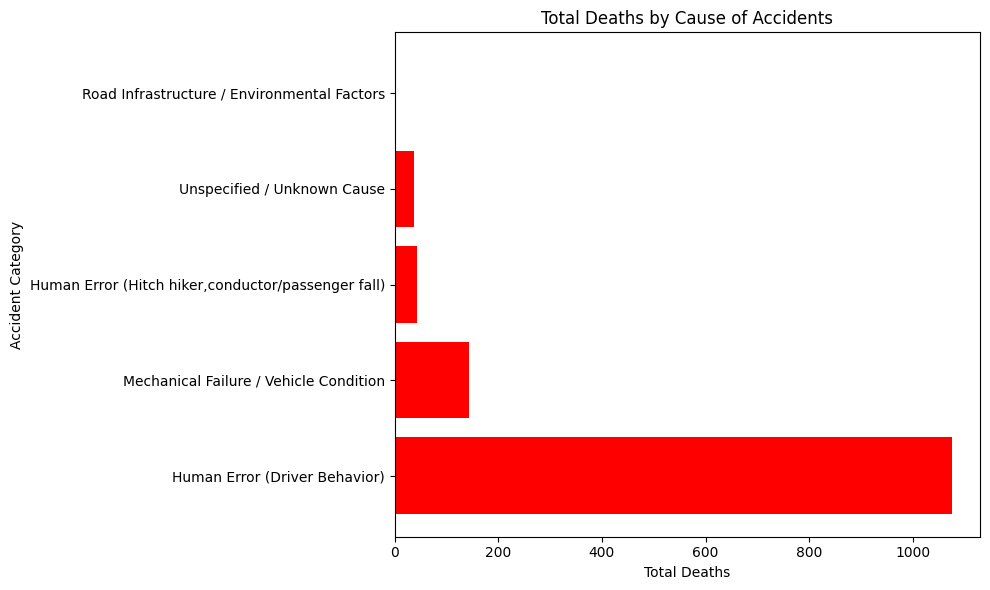

In [14]:
import matplotlib.pyplot as plt

# Replace missing values in 'NO.' with 0
KE_Accidents['NO.'] = KE_Accidents['NO.'].fillna(0)

# Grouping by cause of accident and summing deaths
grouped_data = KE_Accidents.groupby('Cause_of_Accident', as_index=False)['NO.'].sum()

# Sorting for better readability (optional)
grouped_data = grouped_data.sort_values('NO.', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(grouped_data['Cause_of_Accident'], grouped_data['NO.'], color='red')
plt.title('Total Deaths by Cause of Accidents')
plt.xlabel('Total Deaths')
plt.ylabel('Accident Category')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


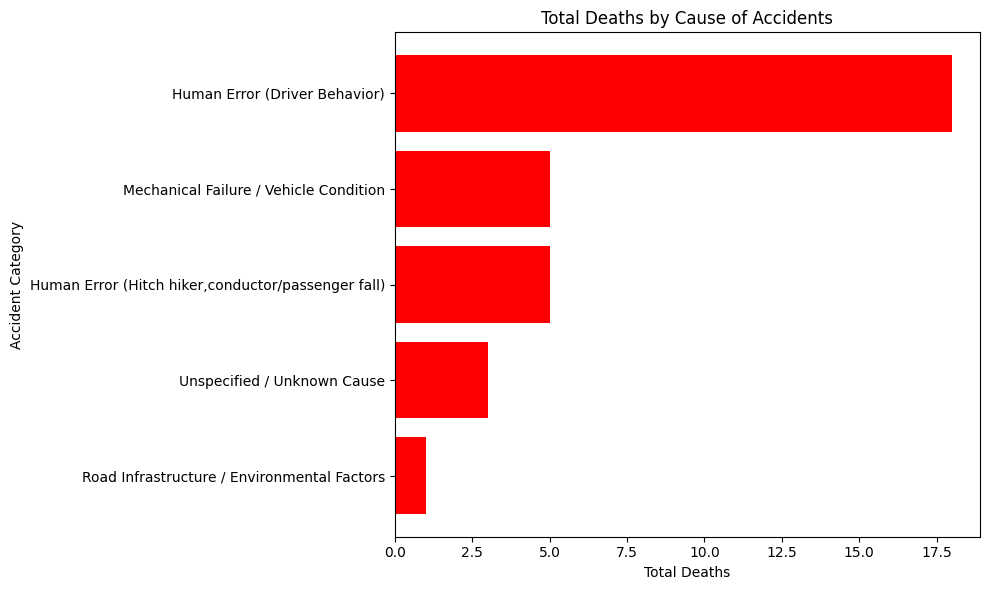

In [95]:
# Horizontal Bar Chart showing causes vs total deaths
import matplotlib.pyplot as plt
KE_Accidents['NO.'] = KE_Accidents['NO.'].fillna(0)

plt.figure(figsize=(10, 6))
plt.barh(KE_Accidents['Cause_of_Accident'], KE_Accidents['NO.'], color='red')
plt.title('Total Deaths by Cause of Accidents')
plt.xlabel('Total Deaths')
plt.ylabel('Accident Category')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

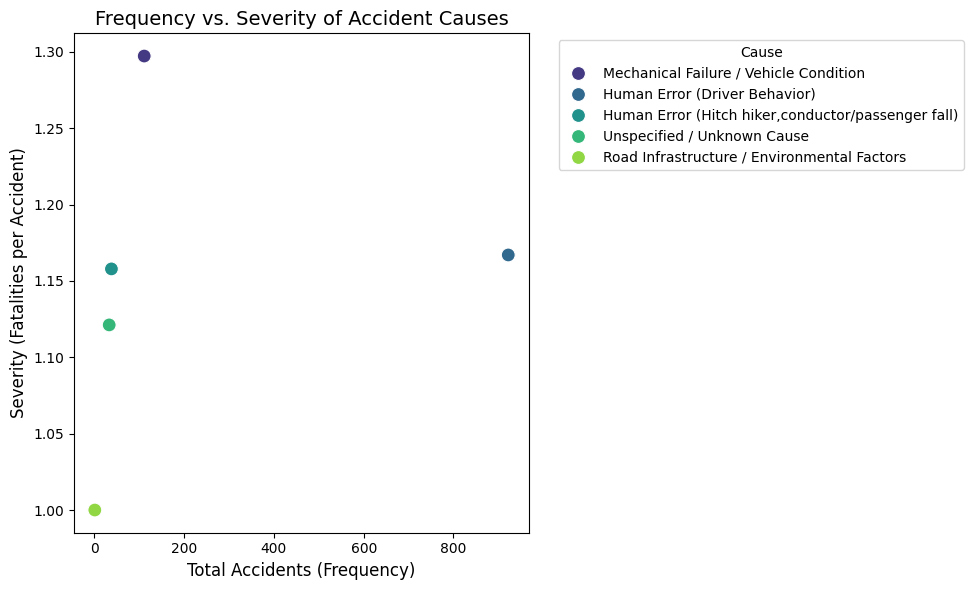

In [15]:
# Scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=severity['Total_Accidents'],
    y=severity['Severity Score'],
    hue=severity['Cause_of_Accident'],
    palette='viridis',
    s=100
)
plt.title('Frequency vs. Severity of Accident Causes', fontsize=14)
plt.xlabel('Total Accidents (Frequency)', fontsize=12)
plt.ylabel('Severity (Fatalities per Accident)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cause')
plt.tight_layout()
plt.show()